<a href="https://colab.research.google.com/github/MemerGamer/IntelligensModszerekTantargy/blob/main/Scikit_learn_osztalyozok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

**1. feladat: adatok betöltése**

(a) Az adatok szemrevételezésével határozza meg az elválasztókarakter (delimiter) értékét!

In [2]:
delimiter = ','
data_with_labels = np.loadtxt('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', delimiter=delimiter)

(b) Az utolsó oszlop tartalmazza a célvátozó (más néven: címke, label) értékét (a konkrét esetben azt, hogy az adott e-mail spam-e vagy sem). Válassza le a célváltozót az adatokról, azaz hozzon létre *data*  ill. *labels* elnevezésű np.array-eket, amelyek csak az adatokat (célvátozó nélkül) illetve csak a célváltozót tartalmazzák! Ellenőrizze az eredeti és a létrehozott tömbök méretét!

In [7]:
data = data_with_labels[:, :-1]
labels = data_with_labels[:, -1]

print(data_with_labels.shape)
print(data.shape)
print(labels.shape)

(4601, 58)
(4601, 57)
(4601,)


(c) Bontsa fel az adatokat és a hozzájuk tartozó címkéket tanító- és tesztadatokra. Minden 5-dik példány, azaz a 4, 9, 14... indexű példányok kerüljenek a teszthalmazba, a többi pedig a tanítóhalmazba! Ehhez első lépésként hozzon létre két np.array-t, amelyek a tanító és tesztpéldányok indexeit tartalmazzák, majd ezeket használva bontsa fel az adatokat és címkéket tanító- és tesztadatokra *data_train*, *data_test* ill. *labels_train* és *labels_test* néven!

In [10]:
test_indices = np.arange(4, len(data), 5)  # Every 5th example starting from index 4
train_indices = np.array([i for i in range(len(data)) if i not in test_indices])

In [11]:
data_train = data[train_indices]
data_test = data[test_indices]
labels_train = labels[train_indices]
labels_test = labels[test_indices]

(d) Az operációs rendszer *wget* parancsával töltse le a

https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names

fájlt és jelenítse meg az első 50 sorát a *head* paranccsal!

Olvassa be a fájlból az oszlopneveket a *column_names* tömbbe!
(Segítség: legelső oszlop neve a fájl 34-dik sorában található.)

In [12]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names

--2025-03-28 15:30:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘spambase.names’

spambase.names          [ <=>                ]   3.48K  --.-KB/s    in 0s      

2025-03-28 15:30:13 (638 MB/s) - ‘spambase.names’ saved [3566]



In [13]:
!head -n 50 spambase.names

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

In [14]:
column_names = []

with open('spambase.names', 'r') as f:
    lines = f.readlines()
    # Starting from line 33 which contains the first feature name
    for i in range(33, len(lines)):
        if lines[i].strip() and ':' in lines[i]:
            name = lines[i].split(':')[0].strip()
            column_names.append(name)
    # Add the target column name
    column_names.append('is_spam')

In [15]:
column_names

['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char_freq_;',
 'char_freq_(',
 'char_freq_[',
 '

**2. feladat: logisztikus regresszió**

(a) Egészítse ki a kódot azzal, hogy kiszámolja azaz osztályozó pontosságát, azaz a helyesen prediktált tesztpéldányok arányát!

(b) Alapbeállítás szerint mennyi a komplexitási tényező (C) értéke? Tanulmányozza a dokumentációt: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html . Állítsa C értékét 10-re, tanítsa a modellt és mérje le a pontosságát a teszt halmazon!

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression()
model.fit(data_train, labels_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
pred = model.predict(data_test)

In [19]:
accuracy = np.mean(pred == labels_test)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9130


In [20]:
model = LogisticRegression(C=10)
model.fit(data_train, labels_train)

pred = model.predict(data_test)
accuracy = np.mean(pred == labels_test)
print(f"Accuracy with C=10: {accuracy:.4f}")

Accuracy with C=10: 0.9239


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**3. feladat: Neurális hálók**

A scikit-learn osztályozói standard interface-t valósítanak meg, rendelkeznek többek között *fit* és *predict* metódusokkal (a modell tanításához ill. új adatra történő predikciók számításához).

(a) Annak ismeretében, hogy az előrecsatolt neurális hálókat a *sklearn.neural_network* csomagon belüli *MLPClassifier* (multilayer perceptron classifer) elnevezésű osztály implementálja, tanítson egy neurális hálót a spam felismerési feladatra és mérje le a háló pontosságát!

(b) Hány belső (rejtett) réteggel rendelkezik a tanított háló? Mennyi a unitok száma az egyes rétegekben? Változtassa meg a háló architektúráját úgy, hogy két rejtett réteggel rendelkezzen és mindkét rétegben 10-10 unit legyen! Tanítsa és értékelje ki a modellt!

(c) Változtassa meg az aktivációs függvényt a szigmoid függvényre, tanítsa és értékelje ki a modellt!

(d) A pytorch-beli neurális hálókkal összehasonlítva, mit mondana a scikit-learn-beli implementációról? Melyikkel könnyebb dolgozni?

In [21]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(data_train, labels_train)

pred = mlp.predict(data_test)
accuracy = np.mean(pred == labels_test)
print(f"MLP Accuracy: {accuracy:.4f}")

MLP Accuracy: 0.9261


In [22]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), random_state=42)
mlp.fit(data_train, labels_train)

pred = mlp.predict(data_test)
accuracy = np.mean(pred == labels_test)
print(f"MLP Accuracy with 2 hidden layers (10,10): {accuracy:.4f}")

MLP Accuracy with 2 hidden layers (10,10): 0.9337


In [23]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), activation='logistic', random_state=42)
mlp.fit(data_train, labels_train)

pred = mlp.predict(data_test)
accuracy = np.mean(pred == labels_test)
print(f"MLP Accuracy with sigmoid activation: {accuracy:.4f}")

MLP Accuracy with sigmoid activation: 0.9380


In [24]:
#...IDE JÖN A KÓD...

**4. feladat: legközelebbi szomszéd osztályozó**

A legközelebbi szoszéd osztályozót az *sklearn.neighbors* csomagon belüli *KNeighborsClassifier* implementálja.

(a) Osztályozza a tesztadatok legközelebbi szomszéd osztályozóval és mérje le az osztályozó pontosságát!

(b) Mit jelent a "tanítás" a legközelebbi szomszéd osztályozó esetében? Mi történik a *fit* metódus meghívásakor?

(c) Mennyi volt az előző alkalommal a legközelebbi szomszédok száma? Milyen eredményt kapunk, ha a legközelebbi szomszédok számát 1-re vagy 10-re állítjuk?

(d) Az ún. *Minkowski távolság* az euklideszi távolság és Manhattan-távolság közös általánosítása: p=2 mellett adódik az euklideszi távolság, p=1-re pedig a Manhattan távolság. Használjon Manhattan távolságot az osztályozás során!

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(data_train, labels_train)

pred = knn.predict(data_test)
accuracy = np.mean(pred == labels_test)
print(f"KNN Accuracy: {accuracy:.4f}")

KNN Accuracy: 0.8022


In [26]:
# ...IDE JÖN A KÓD...

In [27]:

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(data_train, labels_train)
pred1 = knn1.predict(data_test)
accuracy1 = np.mean(pred1 == labels_test)
print(f"KNN Accuracy with 1 neighbor: {accuracy1:.4f}")


knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(data_train, labels_train)
pred10 = knn10.predict(data_test)
accuracy10 = np.mean(pred10 == labels_test)
print(f"KNN Accuracy with 10 neighbors: {accuracy10:.4f}")

KNN Accuracy with 1 neighbor: 0.8174
KNN Accuracy with 10 neighbors: 0.8033


In [29]:
knn_manhattan = KNeighborsClassifier(p=1)  # p=1 for Manhattan distance
knn_manhattan.fit(data_train, labels_train)
pred_manhattan = knn_manhattan.predict(data_test)
accuracy_manhattan = np.mean(pred_manhattan == labels_test)
print(f"KNN Accuracy with Manhattan distance: {accuracy_manhattan:.4f}")

KNN Accuracy with Manhattan distance: 0.8359


**5. feladat: Naive Bayes**

A naive Bayes osztályozó (egyik változatát) az *sklearn.naive_bayes* csomagon belüli *GaussianNB* implementálja. Tanítson egy *GaussianNB*-t és mérje le az osztályozó pontosságát!

In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
nb = GaussianNB()
nb.fit(data_train, labels_train)

GaussianNB()

In [33]:
pred = nb.predict(data_test)

In [34]:

accuracy = np.mean(pred == labels_test)
print(f"Naive Bayes Accuracy: {accuracy:.4f}")

Naive Bayes Accuracy: 0.8174


**6. feladat: Döntési fák**

(a) A döntési fákat az sklearn.tree csomagon belüli DecisionTreeClassifier implementálja. Készítsen egy döntési fát és mérje le az osztályozó pontosságát!

(b) Módosítsa az előbbi kódot úgy, hogy a létrehozott döntési fa mélysége legfeljebb 4 legyen!

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(data_train, labels_train)

pred = dt.predict(data_test)
accuracy = np.mean(pred == labels_test)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

Decision Tree Accuracy: 0.9087


In [36]:
dt_limited = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_limited.fit(data_train, labels_train)

pred = dt_limited.predict(data_test)
accuracy = np.mean(pred == labels_test)
print(f"Decision Tree Accuracy (max_depth=4): {accuracy:.4f}")

Decision Tree Accuracy (max_depth=4): 0.8870


In [38]:
# ...IDE JÖN A KÓD...

In [39]:
# ...IDE JÖN A KÓD...

A döntési fa ábrázolása

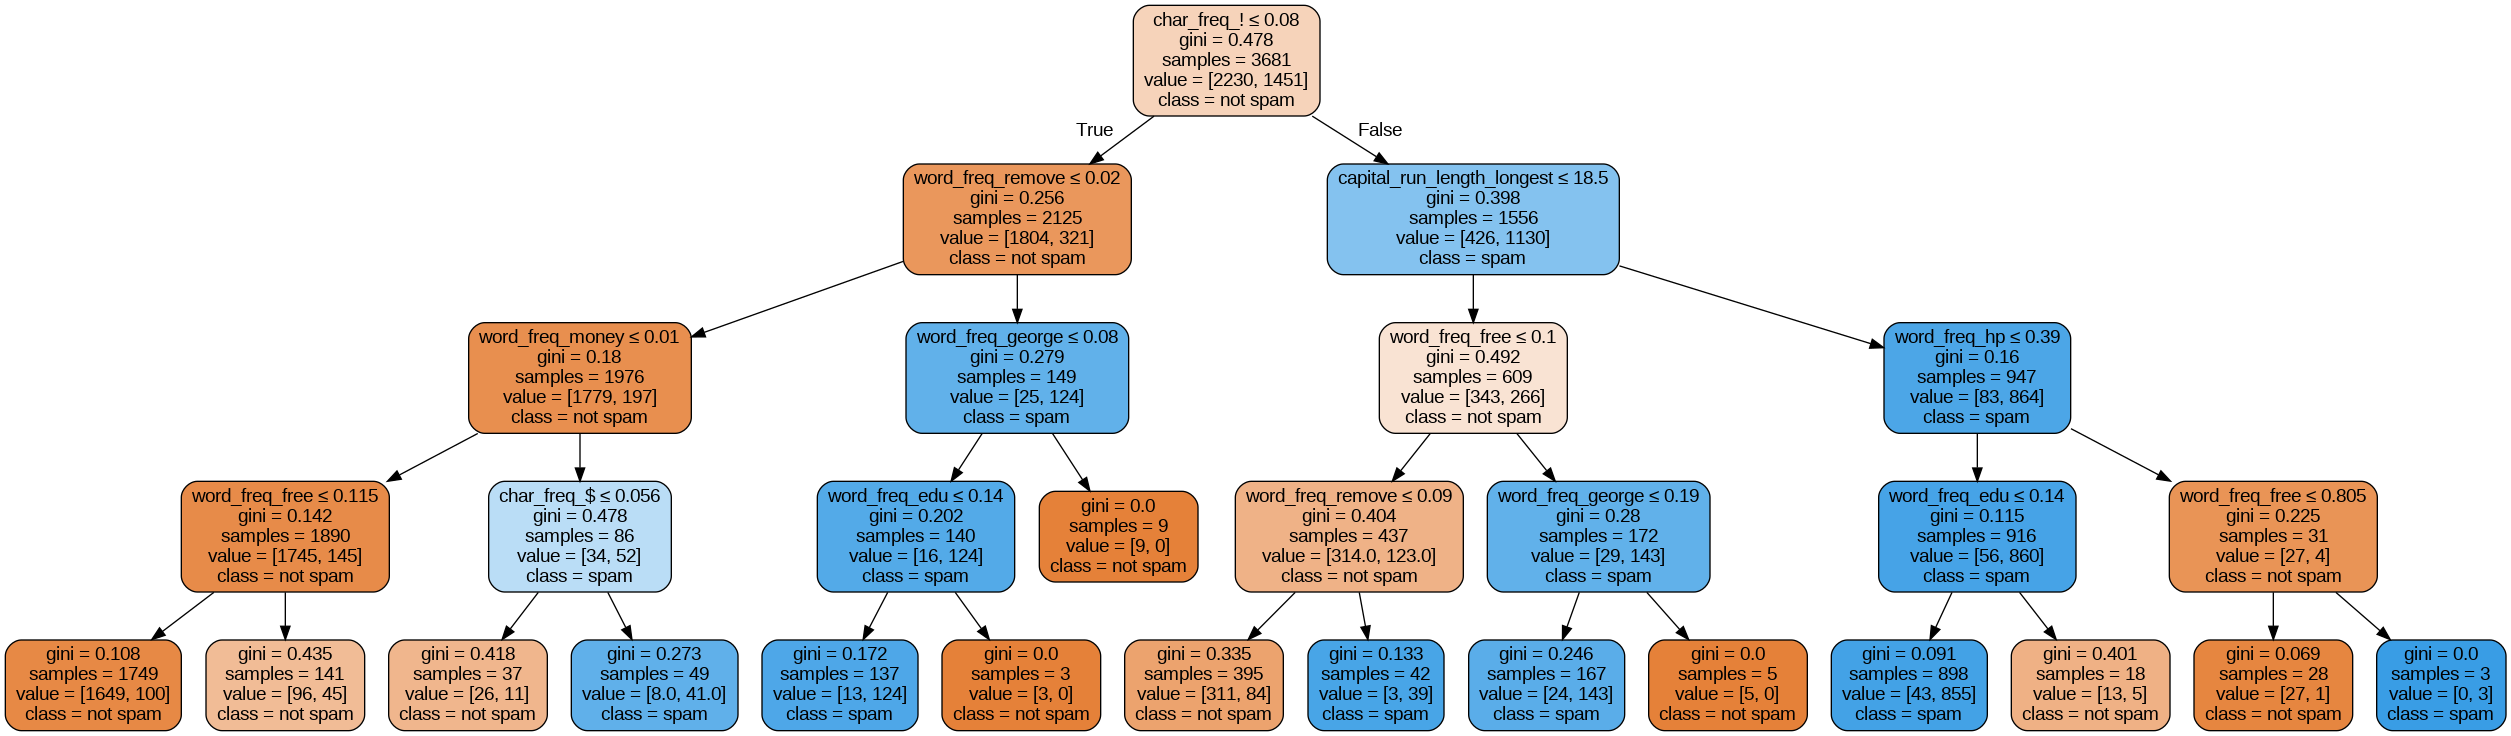

In [42]:
# First create your decision tree model (if you haven't already)
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(data_train, labels_train)

# Now visualize this decision tree model
from io import StringIO
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

feature_names = column_names[:-1]  # Remove the last element ('is_spam')

dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data, feature_names=feature_names,
                class_names=['not spam', 'spam'], filled=True, rounded=True,
                special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())